# Filters

In [8]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from signals.domain import Time
from signals import waves

# Show plots inline.
%matplotlib inline

# Range of frequencies to plot.
FreqRange = (0, 20000)
# Plot resolution.
Steps = 200

The simplest low-pass filter is given by this difference equation: $$y(n) = x(n)+x(n-1)$$ where $x(n)$ is the input amplitude at time (or sample) $n$ and $y(n)$ is the output amplitude at time $n$.

You can also write this in terms of time instead of sample indices this way: $$y(nT)=x(nT)+x[(n-1)T]$$
for $n=0,1,2,...$ where $T$ is the sampling interval in seconds. Usually this is omitted by setting $T=1$.

In [9]:
def simple_lowpass(x, x0=0):
    '''Simplest possible low-pass filter.'''
    y = np.zeros(x.size)
    y[0] = x[0] + x0
    for i in range(1, x.size):
        y[i] = x[i] + x[i - 1]
    return y

## Frequency Response

It's very useful to know how a filter respond across a frequency spectrum $x(\cdot)$.

If we filter a sinusoid at each frequency separately, this is called _sine-wave analysis_.

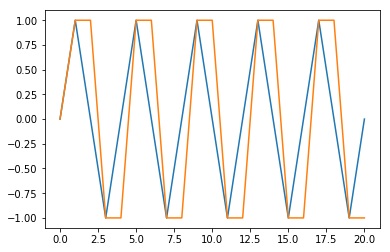

In [10]:
sec = 1.0
time = Time(sec=sec, samples=20)
sine = waves.sine(time.domain, freq=time.rate / 4)
filtered = simple_lowpass(sine)
plt.plot(sine)
plt.plot(filtered)

The ratio of the amplitude of the output to the amplitude of the input is called the _gain_ of the filter.

_NOTE:_ It's hard to see here because I don't know how to reconstruct the continuous signal from the sampled output signal. I should look up how to do this.

This is called the _amplitude response_.

In [11]:
def gain(in_signal, out_signal):
    return np.max(out_signal) / np.max(in_signal)
print(gain(sine, filtered))

1.0000000000000029


We can do this for every frequency between 0 and $f_s / 2$ and graph the result.

/Users/eryn/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


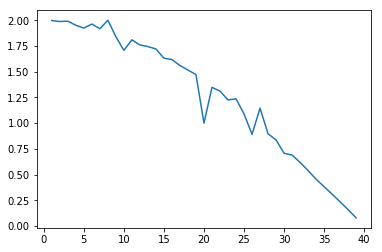

In [21]:
frequencies = np.linspace(0, time.samples // 2, num=40, endpoint=False)
freq_response = np.empty(frequencies.shape[0])
for f in range(0, frequencies.shape[0]):
    sine = waves.sine(time.domain, freq=frequencies[f])
    filtered = simple_lowpass(sine)
    freq_response[f] = np.max(filtered) / np.max(sine)

plt.plot(freq_response)

# TODO: Deal with the nan

Notice here that a the lowest frequency we had a gain boost of 2, which we can express in decibels with the following formula:

In [23]:
20 * np.log10(2)

6.020599913279624

In other words, the filter's gain is about 6 dB.